In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
import random
import shutil
import cv2
import matplotlib.pyplot as plt

INITIALIZE DARK NET FOLDER
---
(Only Done Once)


In [ ]:
path = '/content/drive/MyDrive/MIA/ImageDetection' 

In [ ]:
os.chdir(path)
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15502 (delta 2), reused 3 (delta 1), pack-reused 15490
Receiving objects: 100% (15502/15502), 14.11 MiB | 7.72 MiB/s, done.
Resolving deltas: 100% (10411/10411), done.
Checking out files: 100% (2057/2057), done.


In [16]:
os.chdir(path + '/darknet')
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1150:10: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the 

In [ ]:
!./darknet

/bin/bash: ./darknet: No such file or directory


In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

CONFIGURE FILES
---



In [ ]:
image_path = '/content/drive/MyDrive/MIA/ImageDetection/darknet/data/data_complete'
os.chdir(image_path)

In [ ]:
path_list = []
for current_dir, dirs, files in os.walk('.'):
  for f in files:
    if f.endswith('.jpg'):
      file_loc = image_path + '/' + f
      path_list.append(file_loc + '\n')

In [ ]:
random.shuffle(path_list)

path_test = path_list[:int(len(path_list) * 0.20)]
path_list = path_list[int(len(path_list) * 0.20):]

In [ ]:
with open('train.txt', 'w') as train:
  for i in path_list:
    train.write(i)

with open('test.txt', 'w') as test:
  for i in path_test:
    test.write(i)

In [ ]:
i = 0

with open(image_path + '/' + 'classes.names', 'w') as cls,  \
    open(image_path + '/' + 'classes.txt', 'r') as text:

    for l in text:
      cls.write(l)
      i += 1

with open(image_path + '/' + 'image_data.data', 'w') as data:
  data.write('classes = ' + str(i) + '\n')
  data.write('train = ' + image_path + '/' + 'train.txt' + '\n')
  data.write('valid = ' + image_path + '/' + 'test.txt' + '\n')
  data.write('names = ' + image_path + '/' + 'classes.names' + '\n')
  data.write('backup = backup')

TRAIN MODEL
---



In [ ]:
os.chdir(path + '/darknet')
!sudo chmod +x darknet
!./darknet

usage: ./darknet <function>


In [ ]:
!./darknet detector train data/data_complete/image_data.data cfg/yolov4_train.cfg yolov4.conv.137 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 237802, rewritten_bbox = 0.063919 % 
]2;406/10000: loss=6.3 hours left=23.6
 406: 6.287811, 7.378948 avg loss, 0.000035 rate, 7.940552 seconds, 12992 images, 23.635778 hours left
Loaded: 0.402526 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.757594), count: 2, class_loss = 1.648259, iou_loss = 6.722034, total_loss = 8.370293 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.679637), count: 20, class_loss = 8.353216, iou_loss = 23.665037, total_loss = 32.018253 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.414457), count: 9, class_loss = 4.705941, iou_loss = 1.792100, total_loss = 6.498041 
 total_bbox = 237833, rewritten_bbox = 0.063910 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.702444), count: 3, class_loss = 2.058

In [ ]:
#RUN THIS CELL IF MODEL STOPPED ABRUPTLY

!./darknet detector train data/data_complete/image_data.data cfg/yolov4_train.cfg /content/drive/MyDrive/MIA/ImageDetection/darknet/backup/yolov4_train_last.weights -dont_show

CUDA status Error: file: ./src/dark_cuda.c : () : line: 38 : build time: Nov  5 2022 - 03:33:20 

 CUDA Error: no CUDA-capable device is detected
Darknet error location: ./src/dark_cuda.c, check_error, line #69
CUDA Error: no CUDA-capable device is detected: Bad file descriptor


 GPU isn't used 
 OpenCV version: 3.2.0
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv     64       1 x 1/ 1    304 x 304 x 128 ->  304 x 304 x  64 1.5

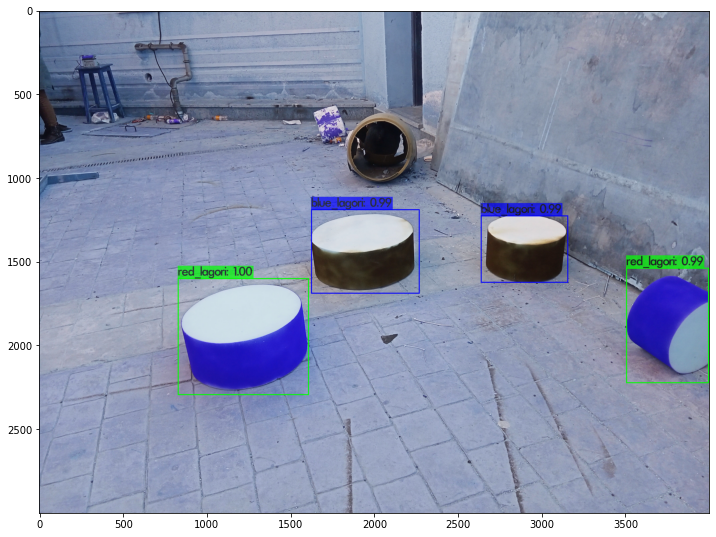

In [18]:
!./darknet detector test data/data_complete/image_data.data cfg/yolov4_test.cfg /content/drive/MyDrive/MIA/ImageDetection/darknet/backup/yolov4_train_last.weights /content/drive/MyDrive/MIA/ImageDetection/darknet/data/lagories/lagori_test_4.jpg -thresh 0.3
%matplotlib inline
img = cv2.imread('predictions.jpg')
# cv2.imshow('HEY', img)
fig = plt.gcf()
fig.set_size_inches(12,14)
plt.imshow(img)

 GPU isn't used 
 OpenCV version: 3.2.0
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv     64       1 x 1/ 1    304 x 304 x 128 ->  304 x 304 x  64 1.5

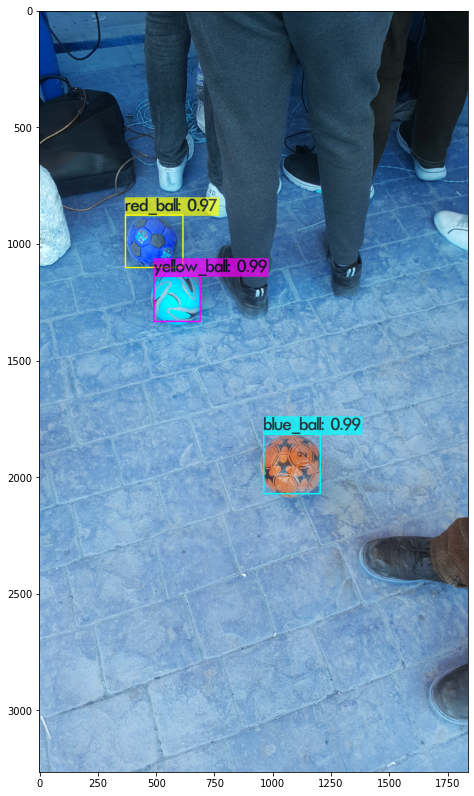

In [20]:
!./darknet detector test data/data_complete/image_data.data cfg/yolov4_test.cfg /content/drive/MyDrive/MIA/ImageDetection/darknet/backup/yolov4_train_last.weights /content/drive/MyDrive/MIA/ImageDetection/darknet/data/balls/ball_test_5.jpg -thresh 0.3
%matplotlib inline
img = cv2.imread('predictions.jpg')
# cv2.imshow('HEY', img)
fig = plt.gcf()
fig.set_size_inches(12,14)
plt.imshow(img)